# Naive Bayes approach

In [1]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

import common

import numpy as np
import pandas as pd
import sklearn.dummy
import sklearn.naive_bayes

In [8]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.20096109803753262
[[0.0634544  0.05905316 0.11990509 0.22580275 0.53178461]
 [0.06085224 0.05921181 0.11619732 0.22626255 0.53747608]
 [0.06169508 0.06052428 0.11854821 0.22794833 0.53128411]
 [0.06225002 0.05990037 0.12071972 0.22609885 0.53103103]
 [0.06174388 0.05992476 0.11887374 0.22457657 0.53488105]]


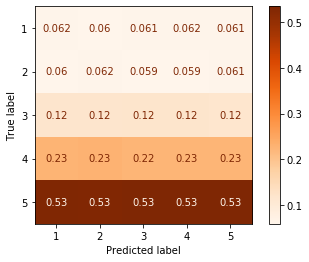

In [6]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

## Performance measure row schema

In [6]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, fit_prior='N/A', alpha='N/A')])
results_df

,classifier_type,sampling,representation,preprocessing,fit_prior,alpha,score
0,baseline,full,count,None,N/A,N/A,0.199627


## One multi-class combined classifier, exposed to all classes at once

In [4]:
### TODO
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        'random_downsampling', 'count', None)
train_as_vec
### TODO

<394889x336512 sparse matrix of type '<class 'numpy.int64'>'
	with 41221381 stored elements in Compressed Sparse Row format>

In [ ]:
for sampling in ['random_downsampling', 'full']:
    for representation in ['count', 'tf_idf']:
        for preprocessing in [None, 'stem']:
            for fit_prior in [False, True]:
                for alpha in np.arange(0.1, 5., .1):

                    train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        sampling, representation, preprocessing)

                    classifier = sklearn.naive_bayes.MultinomialNB(fit_prior=fit_prior, alpha=alpha)
                    classifier.fit(train_as_vec, train_targets)

                    results_df = results_df.append([
                            common.perf_row(
                                classifier, test_as_vec, test_targets,
                                'multiclass', sampling, representation, 
                                preprocessing, fit_prior=fit_prior, alpha=alpha)])

have to generate new vectorizations
have to generate new vectorizations


In [25]:
results_df.sort_values('score', ascending=False).head(25)

,sampling,representation,preprocessing,fit_prior,alpha,score
0,random_downsampling,count,None,True,2.3,0.467289
0,random_downsampling,count,None,True,2.3,0.467289
0,random_downsampling,count,None,True,2.2,0.467215
0,random_downsampling,count,None,True,2.2,0.467215
0,random_downsampling,count,None,True,2.4,0.467039
0,random_downsampling,count,None,True,2.4,0.467039
0,random_downsampling,count,None,True,1.8,0.466962
0,random_downsampling,count,None,True,1.8,0.466962
0,random_downsampling,count,None,True,2.1,0.466958
0,random_downsampling,count,None,True,2.1,0.466958
